In [8]:
import pandas as pd 
import matplotlib.pyplot as plt

from basic_visuals import df_list, years

In [3]:
for df, year in zip(df_list, years):
    df['year'] = year
df_all = pd.concat(df_list, ignore_index=True)
df_all

,country,region,happiness_rank,happiness_score,standard_error,economy,family,health,freedom,trust,generosity,dystopia_residual,year,lower_confidence_interval,upper_confidence_interval,whisker_high,whisker_low,social_support
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,Rwanda,NaN,152,3.334,NaN,0.35900,NaN,0.61400,0.55500,0.41100,0.21700,NaN,2019,NaN,NaN,NaN,NaN,0.711
778,Tanzania,NaN,153,3.231,NaN,0.47600,NaN,0.49900,0.41700,0.14700,0.27600,NaN,2019,NaN,NaN,NaN,NaN,0.885
779,Afghanistan,NaN,154,3.203,NaN,0.35000,NaN,0.36100,0.00000,0.02500,0.15800,NaN,2019,NaN,NaN,NaN,NaN,0.517
780,Central African Republic,NaN,155,3.083,NaN,0.02600,NaN,0.10500,0.22500,0.03500,0.23500,NaN,2019,NaN,NaN,NaN,NaN,0.000


In [4]:
# standardize the country column
df_all.columns = df_all.columns.str.lower().str.strip()
if 'country' not in df_all.columns:
    df_all.rename(columns={'country or region' : 'country'}, inplace=True)

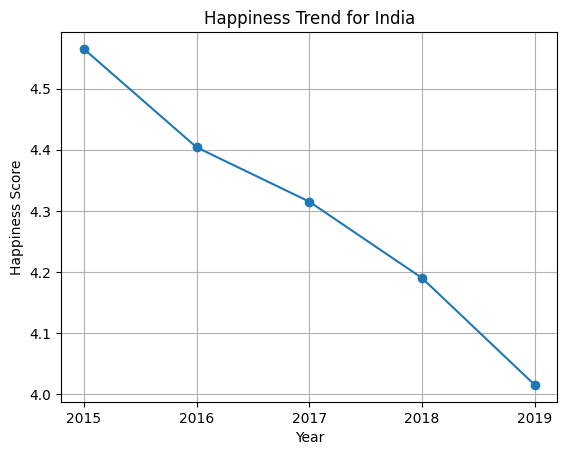

In [5]:
# choose a country
country_name = 'India'

# filter for that country
country_data = df_all[df_all['country'] == country_name]

# plot the trend
plt.plot(country_data['year'], country_data['happiness_score'], marker='o')
plt.title(f'Happiness Trend for {country_name}')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.grid(True)
plt.xticks(country_data['year'])  # ensure all years are marked
plt.show()

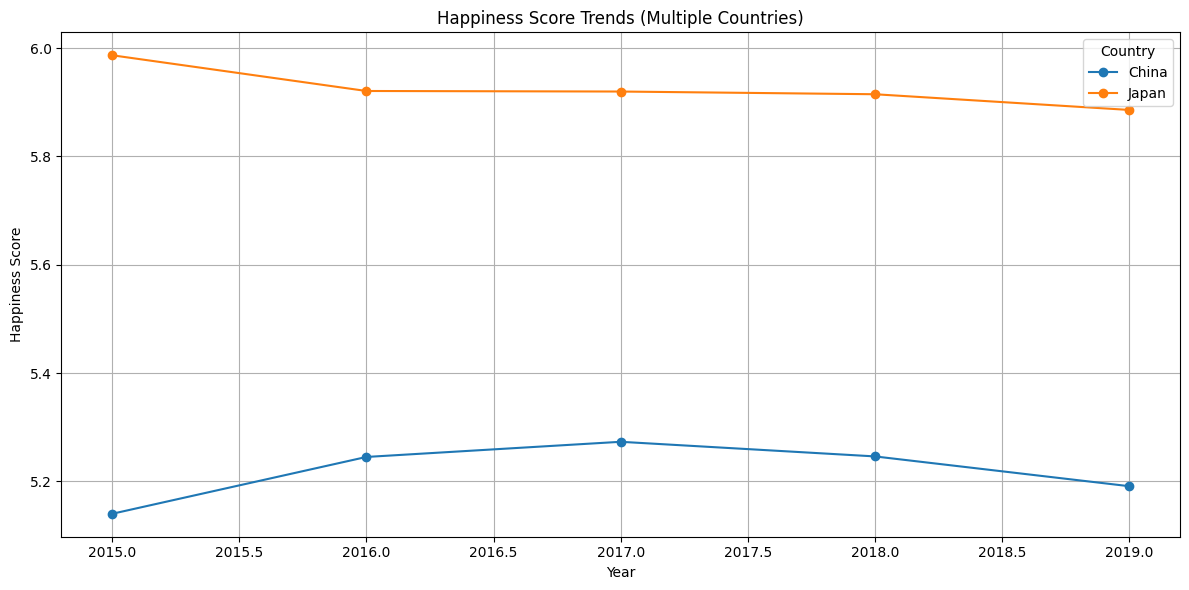

In [12]:
# List of countries to compare
countries_to_compare = ['China', 'Japan'] # ['Nepal', 'Bangladesh', 'Pakistan', 'India']

# Filter df_all to include only selected countries
df_filtered = df_all[df_all['country'].isin(countries_to_compare)]

# Pivot for easier plotting: rows = year, columns = country, values = score
pivot_df = df_filtered.pivot_table(index='year', columns='country', values='happiness_score')

# Plot
pivot_df.plot(marker='o', figsize=(12, 6))
plt.title('Happiness Score Trends (Multiple Countries)')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()